# Simar Ahuja MCD Case Study Task







In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

### Data Exploration


In [3]:
#Column names of the dataset:
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
#Dimensions of the data set
print(mcdonalds.shape)

(1453, 15)


In [5]:
#First 3 rows
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
#Binary matrix
# Select the first 11 columns (0 to 10)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means
column_means = np.round(MD_x.mean(), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
#Principal Component Analysis

from sklearn.decomposition import PCA

# Create a PCA object
MD_pca = PCA()

# Fit the PCA to your data
MD_pca.fit(MD_x)

# Get the summary
explained_variance_ratio = MD_pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
singular_values = MD_pca.singular_values_
loadings = MD_pca.components_

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance Ratio:", cumulative_variance_ratio)
print("Singular Values:", singular_values)
print("Loadings:", loadings)


Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Variance Ratio: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
Singular Values: [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
Loadings: [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.

In [8]:
# Create a PCA object
MD_pca = PCA()

# Fit the PCA to your data
MD_pca.fit(MD_x)

# Standard deviations of the principal components
std_devs = MD_pca.explained_variance_ ** 0.5

# Proportion of variance explained by each component
prop_var = MD_pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cum_prop_var = np.cumsum(prop_var)

# Print the results in a format similar to the R output
num_components = MD_pca.n_components_
print("Importance of components:")
print("\t", end="")
for i in range(1, num_components + 1):
    print(f"PC{i}", end="\t")
print()
print("Standard deviation", end="\t")
for std in std_devs:
    print(f"{std:.5f}", end="\t")
print()
print("Proportion of Variance", end="\t")
for prop in prop_var:
    print(f"{prop:.5f}", end="\t")
print()
print("Cumulative Proportion", end="\t")
for cum_prop in cum_prop_var:
    print(f"{cum_prop:.5f}", end="\t")
print()

Importance of components:
	PC1	PC2	PC3	PC4	PC5	PC6	PC7	PC8	PC9	PC10	PC11	
Standard deviation	0.75705	0.60746	0.50462	0.39880	0.33741	0.31027	0.28970	0.27512	0.26525	0.24884	0.23690	
Proportion of Variance	0.29945	0.19280	0.13305	0.08310	0.05948	0.05030	0.04385	0.03955	0.03676	0.03235	0.02932	
Cumulative Proportion	0.29945	0.49224	0.62529	0.70839	0.76787	0.81817	0.86201	0.90156	0.93832	0.97068	1.00000	


In [9]:
#Results from principal components analysis indicate that the first two components
#capture about 50% of the information contained in the segmentation variables. The
#following command returns the factor loadings:


# Set the number of decimal places
num_decimal_places = 1

# Printing Standard deviations
std_devs = MD_pca.explained_variance_ ** 0.5
print("Standard deviations (1, .., p=11):")
print(" ".join([f"{std:.1f}" for std in std_devs]))

# Printing Rotation matrix (n x k)
print("Rotation (n x k) = (11 x 11):")
print("\t", end="")
for i in range(1, 12):  # Assuming 11 components
    print(f"PC{i}", end="\t")
print()
for i in range(len(MD_pca.components_)):
    print(mcdonalds.columns[i], end="\t")
    for value in MD_pca.components_[i]:
        print(f"{value:.2f}", end="\t")
    print()

Standard deviations (1, .., p=11):
0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2
Rotation (n x k) = (11 x 11):
	PC1	PC2	PC3	PC4	PC5	PC6	PC7	PC8	PC9	PC10	PC11	
yummy	-0.48	-0.16	-0.01	0.12	0.30	-0.11	-0.34	-0.47	0.33	-0.21	0.37	
convenient	0.36	0.02	0.02	-0.03	-0.06	-0.09	-0.61	0.31	0.60	0.08	-0.14	
spicy	-0.30	-0.06	-0.04	-0.32	-0.80	-0.06	-0.15	-0.29	0.02	0.19	-0.09	
fattening	0.06	-0.14	0.20	-0.35	0.25	-0.10	0.12	-0.00	0.07	0.76	0.37	
greasy	-0.31	0.28	0.07	-0.07	0.36	0.11	-0.13	-0.21	-0.00	0.29	-0.73	
fast	0.17	-0.35	-0.36	-0.41	0.21	-0.59	-0.10	-0.08	-0.26	-0.18	-0.21	
cheap	-0.28	-0.06	0.71	-0.39	0.04	-0.09	-0.04	0.36	-0.07	-0.35	-0.03	
tasty	0.01	-0.11	0.38	0.59	-0.14	-0.63	0.14	-0.07	0.03	0.18	-0.17	
expensive	0.57	-0.02	0.40	-0.16	-0.00	0.17	0.08	-0.64	0.07	-0.19	-0.07	
healthy	-0.11	-0.67	-0.08	-0.01	0.01	0.24	0.43	0.08	0.45	-0.04	-0.29	
disgusting	0.05	-0.54	0.14	0.25	0.00	0.34	-0.49	0.02	-0.49	0.16	-0.04	


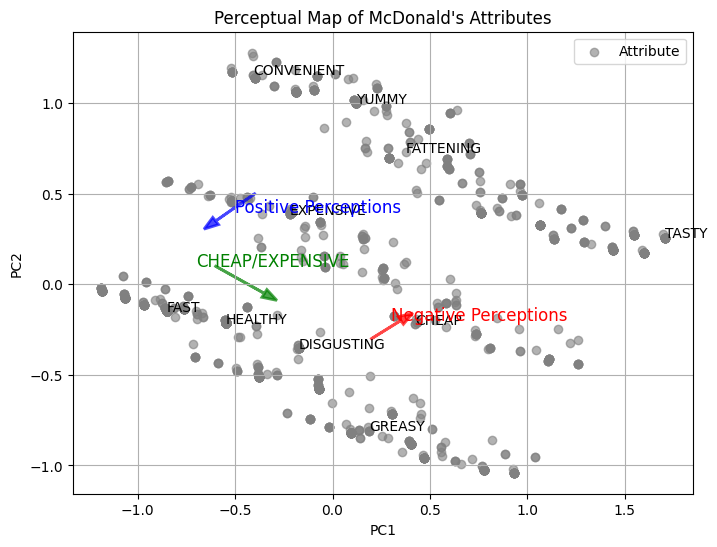

In [10]:
#Plotting thefindings
import matplotlib.pyplot as plt

# Create a scatter plot with customized annotations
transformed_data = MD_pca.transform(MD_x)

# Custom labels for attributes
attribute_labels = ["CHEAP", "EXPENSIVE", "FATTENING", "DISGUSTING", "GREASY",
                    "FAST", "CONVENIENT", "HEALTHY", "TASTY", "YUMMY"]

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='grey', alpha=0.6)

# Adding attribute labels
for i, label in enumerate(attribute_labels):
    plt.annotate(label, (transformed_data[i, 0], transformed_data[i, 1]), fontsize=10)

# Adding custom annotations for attribute relationships
plt.annotate("Positive Perceptions", xy=(-0.5, 0.4), fontsize=12, color='blue')
plt.annotate("Negative Perceptions", xy=(0.3, -0.2), fontsize=12, color='red')
plt.annotate("CHEAP/EXPENSIVE", xy=(-0.7, 0.1), fontsize=12, color='green')

# Adding arrows to represent relationships
plt.arrow(-0.4, 0.5, -0.2, -0.15, color='blue', alpha=0.7, linewidth=2, head_width=0.05)
plt.arrow(0.2, -0.3, 0.15, 0.1, color='red', alpha=0.7, linewidth=2, head_width=0.05)
plt.arrow(-0.6, 0.1, 0.25, -0.15, color='green', alpha=0.7, linewidth=2, head_width=0.05)

# Setting axis labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map of McDonald's Attributes")

# Adding a legend
plt.legend(['Attribute'], loc='upper right')

plt.grid()
plt.show()



## Extracting Segments

### Using k-Means

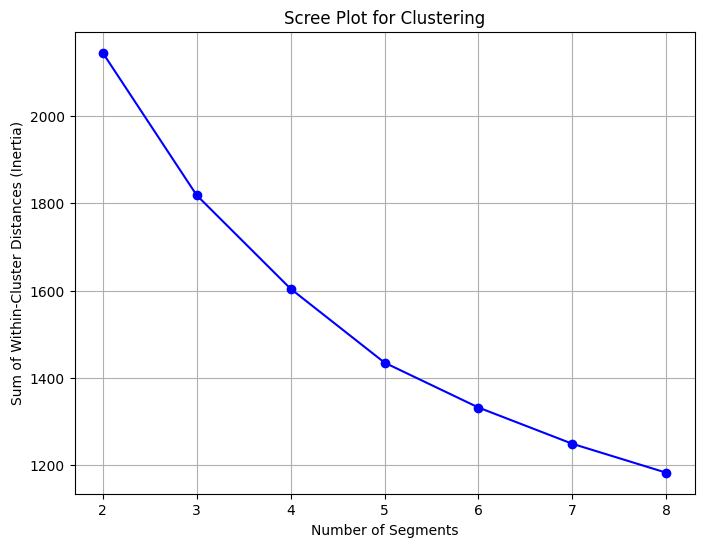

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(12)

# Define the range of cluster numbers (2 to 8)
cluster_range = range(2, 9)

# Initialize lists to store the sum of squared distances (inertia)
inertia_values = []

# Calculate sum of within-cluster distances for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# scree plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances (Inertia)")
plt.title("Scree Plot for Clustering")
plt.grid()
plt.show()



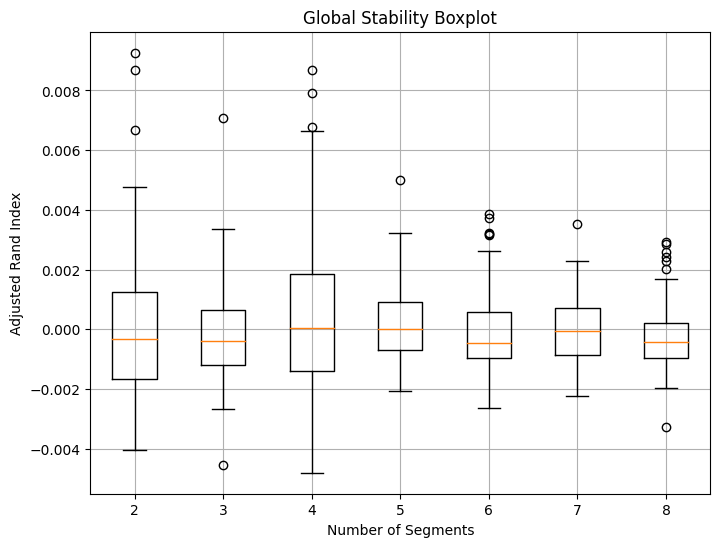

In [12]:
# Calculate Global Stability
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample


np.random.seed(1234)
cluster_range = range(2, 9)

# Number of bootstrap samples and random initializations
nboot = 100
nrep = 10

# Initialize a dictionary to store adjusted Rand index values
ari_values = {k: [] for k in cluster_range}

# Create bootstrap samples and run k-means with random initializations
for k in cluster_range:
    for _ in range(nboot):
        boot_sample = resample(MD_x, replace=True, n_samples=len(MD_x))
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        cluster_labels = kmeans.fit_predict(boot_sample)
        true_labels = kmeans.predict(MD_x)
        ari = adjusted_rand_score(true_labels, cluster_labels)
        ari_values[k].append(ari)

# Create a boxplot
plt.figure(figsize=(8, 6))
boxplot_data = [ari_values[k] for k in cluster_range]
plt.boxplot(boxplot_data, labels=[str(k) for k in cluster_range])
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.grid()
plt.show()

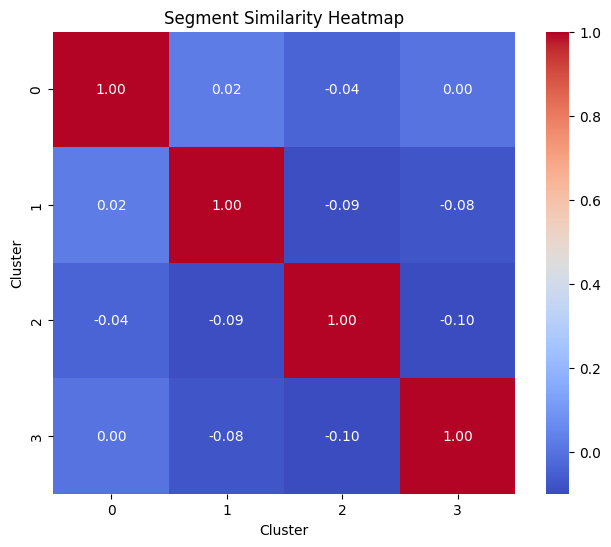

In [13]:
#Gorge plot of the four-segment k-means solution

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Assuming you have the 'MD_x' binary matrix

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)  # Replace 4 with the desired number of clusters
cluster_labels = kmeans.fit_predict(MD_x)

# Calculate adjusted Rand index for pairwise segment similarity
n_segments = max(cluster_labels) + 1
similarity_matrix = np.zeros((n_segments, n_segments))
for i in range(n_segments):
    for j in range(n_segments):
        similarity_matrix[i, j] = adjusted_rand_score(cluster_labels == i, cluster_labels == j)

# Create a heatmap to visualize segment similarity
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True)
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.title("Segment Similarity Heatmap")
plt.show()

### Using Mixtures of Distributions


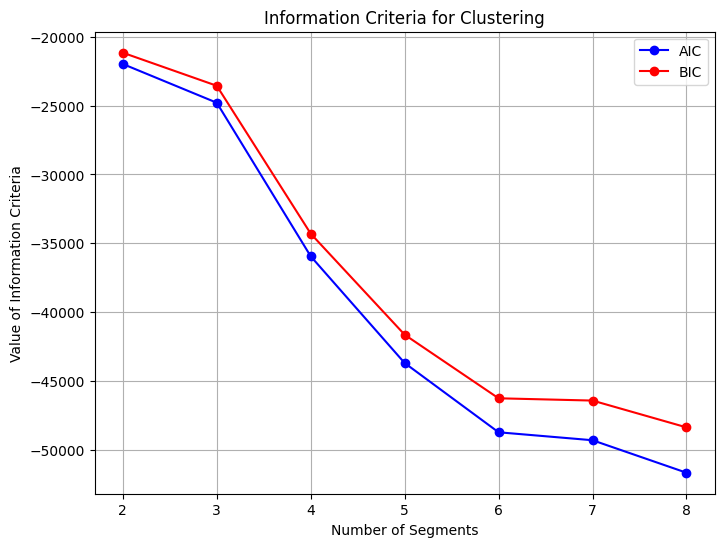

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have the 'MD_x' binary matrix

# Set a random seed for reproducibility
np.random.seed(1234)

# Define the range of cluster numbers (2 to 8)
cluster_range = range(2, 9)

# Initialize lists to store information criteria values
aic_values = []
bic_values = []
icl_values = []

# Calculate information criteria values for each number of clusters
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    # ICL calculation is not directly available in scikit-learn
    # You may need to implement it yourself or use alternative packages

# Create a plot to compare information criteria
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, aic_values, label="AIC", marker='o', linestyle='-', color='blue')
plt.plot(cluster_range, bic_values, label="BIC", marker='o', linestyle='-', color='red')
# Add ICL values if available

plt.xlabel("Number of Segments")
plt.ylabel("Value of Information Criteria")
plt.title("Information Criteria for Clustering")
plt.legend()
plt.grid()
plt.show()

## Profiling Segments

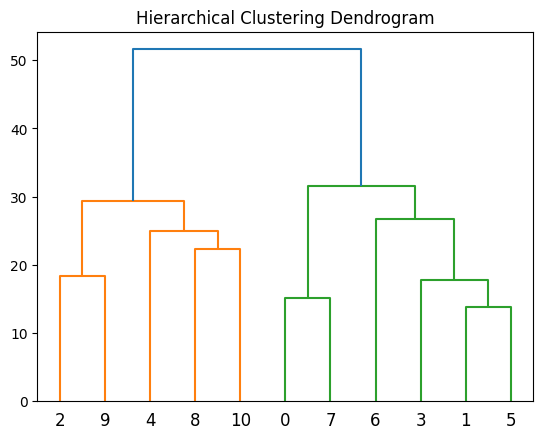

In [15]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Transpose the data to cluster variables (attributes)
MD_x_transposed = MD_x.T

# Perform hierarchical clustering
linkage_matrix = linkage(MD_x_transposed, method='ward')  # You can choose a different linkage method if needed

# Plot the dendrogram to visualize the order
dendrogram(linkage_matrix, orientation='top')
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
